## Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler
from deap import base, creator, tools, algorithms

## Load and Explore the Dataset

In [2]:
# Load the dataset
data_path = '/Users/chayonimeu/Documents/GitHub/Multi-Objective-Optimization-for-Human-Development-and-Environmental-Sustainability-Using-Enhanced-Genetic-Algorithms/Human Development Index - Full.csv'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(data_path)

# Show the first few rows of the dataset to understand its structure
df.head()

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Human Development Index (1990),Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),...,Material footprint per capita (tonnes) (2012),Material footprint per capita (tonnes) (2013),Material footprint per capita (tonnes) (2014),Material footprint per capita (tonnes) (2015),Material footprint per capita (tonnes) (2016),Material footprint per capita (tonnes) (2017),Material footprint per capita (tonnes) (2018),Material footprint per capita (tonnes) (2019),Material footprint per capita (tonnes) (2020),Material footprint per capita (tonnes) (2021)
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,...,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,26.0,0.728,0.739,0.742,0.748,0.755,...,49.56,49.68,55.49,59.76,64.95,75.61,65.97,68.95,68.95,68.95


In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Check the data types of each column
data_types = df.dtypes

# Display missing values and data types
print(missing_values)
print(data_types)

ISO3                                              0
Country                                           0
Human Development Groups                          4
UNDP Developing Regions                          44
HDI Rank (2021)                                   4
                                                 ..
Material footprint per capita (tonnes) (2017)    38
Material footprint per capita (tonnes) (2018)    38
Material footprint per capita (tonnes) (2019)    38
Material footprint per capita (tonnes) (2020)    38
Material footprint per capita (tonnes) (2021)    38
Length: 880, dtype: int64
ISO3                                              object
Country                                           object
Human Development Groups                          object
UNDP Developing Regions                           object
HDI Rank (2021)                                  float64
                                                  ...   
Material footprint per capita (tonnes) (2017)    float64
Mat

In [3]:
# Apply Backward Fill for missing values
df = df.bfill()

# Check if any missing values are left
missing_values_after_bfill = df.isnull().sum()

# Display missing values after backward fill
print(missing_values_after_bfill)

ISO3                                             0
Country                                          0
Human Development Groups                         0
UNDP Developing Regions                          0
HDI Rank (2021)                                  0
                                                ..
Material footprint per capita (tonnes) (2017)    0
Material footprint per capita (tonnes) (2018)    0
Material footprint per capita (tonnes) (2019)    0
Material footprint per capita (tonnes) (2020)    0
Material footprint per capita (tonnes) (2021)    0
Length: 880, dtype: int64


In [6]:
# Check if any columns still have missing values
print(df.isnull().sum().sum())  # Total missing values across the entire dataset

# Check the summary of the dataset after handling missing data
df.describe()

0


,HDI Rank (2021),Human Development Index (1990),Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),Human Development Index (1995),Human Development Index (1996),Human Development Index (1997),Human Development Index (1998),...,Material footprint per capita (tonnes) (2012),Material footprint per capita (tonnes) (2013),Material footprint per capita (tonnes) (2014),Material footprint per capita (tonnes) (2015),Material footprint per capita (tonnes) (2016),Material footprint per capita (tonnes) (2017),Material footprint per capita (tonnes) (2018),Material footprint per capita (tonnes) (2019),Material footprint per capita (tonnes) (2020),Material footprint per capita (tonnes) (2021)
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,94.841026,0.598077,0.601154,0.604010,0.607995,0.612944,0.625210,0.630826,0.636241,0.641574,...,15.798872,15.898205,15.965333,15.987744,15.955487,16.139026,14.980154,15.227385,15.227385,15.227385
std,55.265716,0.162697,0.162959,0.163383,0.164712,0.165319,0.159009,0.159651,0.160648,0.161473,...,14.869861,15.346843,15.307555,15.718196,16.015028,16.424129,14.475771,15.402908,15.402908,15.402908
min,1.000000,0.216000,0.218000,0.222000,0.227000,0.232000,0.238000,0.243000,0.248000,0.256000,...,0.430000,0.420000,0.450000,0.560000,0.600000,0.610000,0.500000,0.470000,0.470000,0.470000
25%,47.500000,0.484000,0.484000,0.485000,0.485000,0.487000,0.513000,0.516000,0.525000,0.530500,...,4.465000,4.295000,4.350000,4.215000,4.265000,4.390000,4.350000,4.465000,4.465000,4.465000
50%,91.000000,0.636000,0.632000,0.628000,0.634000,0.639000,0.655000,0.656000,0.662000,0.666000,...,10.530000,10.370000,10.680000,10.020000,10.400000,10.740000,10.890000,10.560000,10.560000,10.560000
75%,141.500000,0.727500,0.728000,0.727000,0.735000,0.742500,0.752000,0.755500,0.766000,0.776000,...,21.195000,20.950000,20.970000,21.490000,21.500000,21.160000,18.960000,19.035000,19.035000,19.035000
max,191.000000,0.872000,0.873000,0.878000,0.880000,0.884000,0.885000,0.887000,0.890000,0.895000,...,74.560000,82.970000,81.100000,86.780000,83.510000,88.700000,71.160000,85.700000,85.700000,85.700000


### Updated Function to Restructure Data into Year-Indexed Format

In [4]:
# Function to restructure year-based columns into a single year-indexed format
def restructure_yearly_columns(df, exclude_columns):
    years = [str(year) for year in range(1990, 2022)]
    restructured_data = {}
    
    for col in df.columns:
        if not any(exclude in col for exclude in exclude_columns):
            for year in years:
                if year in col:
                    key = col.replace(f" ({year})", "")
                    if key not in restructured_data:
                        restructured_data[key] = {}
                    restructured_data[key][int(year)] = df[col].values
    return restructured_data

# Exclude columns that are not yearly data
exclude_columns = ['ISO3', 'Country', 'Human Development Groups', 'UNDP Developing Regions', 
                   'HDI Rank (2021)', 'GDI Group (2021)', 'GII Rank (2021)', 
                   'Difference from HDI rank (2021)']

# Restructure the data
restructured_data = restructure_yearly_columns(df, exclude_columns)

# Example: Access the restructured data for 'Human Development Index'
print(restructured_data['Human Development Index'])

{1990: array([0.273, 0.647, 0.647, 0.728, 0.728, 0.723, 0.656, 0.865, 0.865,
       0.825, 0.29 , 0.29 , 0.816, 0.359, 0.397, 0.397, 0.684, 0.742,
       0.593, 0.593, 0.593, 0.593, 0.55 , 0.61 , 0.725, 0.77 , 0.586,
       0.586, 0.338, 0.86 , 0.851, 0.706, 0.484, 0.427, 0.452, 0.386,
       0.522, 0.61 , 0.66 , 0.66 , 0.66 , 0.68 , 0.716, 0.742, 0.829,
       0.834, 0.834, 0.834, 0.577, 0.591, 0.651, 0.572, 0.757, 0.757,
       0.732, 0.814, 0.814, 0.642, 0.791, 0.61 , 0.61 , 0.804, 0.46 ,
       0.46 , 0.269, 0.343, 0.759, 0.759, 0.759, 0.484, 0.484, 0.509,
       0.788, 0.516, 0.429, 0.429, 0.72 , 0.526, 0.434, 0.737, 0.601,
       0.528, 0.811, 0.787, 0.778, 0.659, 0.622, 0.845, 0.673, 0.474,
       0.638, 0.378, 0.737, 0.737, 0.737, 0.718, 0.405, 0.666, 0.666,
       0.666, 0.69 , 0.636, 0.636, 0.479, 0.734, 0.786, 0.73 , 0.447,
       0.653, 0.653, 0.662, 0.662, 0.662, 0.237, 0.237, 0.237, 0.73 ,
       0.333, 0.579, 0.579, 0.238, 0.397, 0.626, 0.303, 0.64 , 0.579,
       0.216,

"correct column name: Carbon dioxide emissions per capita (production) (tonnes) (year)"

Where Data columns are: 

ISO3,Country,Human Development Groups,UNDP Developing Regions .

HDI Rank (2021),GDI Group (2021), GII Rank (2021), Difference from HDI rank (2021) .

1990 - 2021 : Human Development Index (year), Life Expectancy at Birth (year), Expected Years of Schooling (year), Mean Years of Schooling (year), Gross National Income Per Capita (year), Gender Development Index (year), Gender Inequality Index (year), "Maternal Mortality Ratio (deaths per 100,000 live births) (year)", "Adolescent Birth Rate (births per 1,000 women ages 15-19) (year)", Planetary pressures-adjusted Human Development Index, Difference from HDI value (%) (year), Carbon dioxide emissions per capita (production) (tonnes) (year), Material footprint per capita (tonnes) (year) .

Female 1990 - 2021 : HDI female, "Life Expectancy at Birth, female (year)" , "Expected Years of Schooling, female (year)", "Mean Years of Schooling, female (year)" "Gross National Income Per Capita, female (year)", "Labour force participation rate, female (% ages 15 and older) (year)" .

Male 1990 - 2021 : HDI male, "Life Expectancy at Birth, male (year)" , "Expected Years of Schooling, male (year)", "Mean Years of Schooling, male (year)" "Gross National Income Per Capita, male (year)", "Labour force participation rate, male (% ages 15 and older) (year)" .

2010- 2021: Inequality-adjusted Human Development Index, Coefficient of human inequality, Overall loss (%), Inequality in life expectancy, Inequality in eduation, Inequality in income .

### Feature Engineering

In [5]:
def create_diff_features(df, column_name):
    years = [str(year) for year in range(1991, 2022)]  # Creating range for 1991-2021, as we're calculating diff from 1990
    diff_columns = {}  # Dictionary to hold the difference columns

    # Loop over years to create the difference columns
    for year in years:
        previous_year = str(int(year) - 1)
        diff_column = column_name + '_Change_' + year
        
        # Creating the difference column
        diff_columns[diff_column] = df[column_name + f" ({year})"] - df[column_name + f" ({previous_year})"]

    # Concatenate the new columns into the DataFrame at once
    diff_df = pd.DataFrame(diff_columns)
    df = pd.concat([df, diff_df], axis=1)
    
    return df

# Now apply the function for your key indicators
df = create_diff_features(df, 'Human Development Index')
df = create_diff_features(df, 'Gross National Income Per Capita')
df = create_diff_features(df, 'Life Expectancy at Birth')

# Example: Gender disparity ratios for GNI, Life Expectancy, etc.
df['GNI_Male_Female_Ratio_2021'] = df['Gross National Income Per Capita, male (2021)'] / df['Gross National Income Per Capita, female (2021)']
df['Life_Expectancy_Male_Female_Ratio_2021'] = df['Life Expectancy at Birth, male (2021)'] / df['Life Expectancy at Birth, female (2021)']

In [8]:


# Step 1: Rolling Averages
# Rolling averages for Human Development Index and Gross National Income
df['HDI_5yr_Rolling_Avg'] = df[[f'Human Development Index ({year})' for year in range(1996, 2022)]].mean(axis=1)
df['GNI_5yr_Rolling_Avg'] = df[[f'Gross National Income Per Capita ({year})' for year in range(1996, 2022)]].mean(axis=1)

# Step 2: Growth Rate Features
# Growth rate for HDI and GNI per year
for year in range(1991, 2022):
    prev_year = year - 1
    df[f'HDI_Growth_{year}'] = (df[f'Human Development Index ({year})'] - df[f'Human Development Index ({prev_year})']) / df[f'Human Development Index ({prev_year})']
    df[f'GNI_Growth_{year}'] = (df[f'Gross National Income Per Capita ({year})'] - df[f'Gross National Income Per Capita ({prev_year})']) / df[f'Gross National Income Per Capita ({prev_year})']

# Step 3: Interaction Features (Gender Disparities)
# Gender disparity between Male and Female in HDI and Life Expectancy
df['HDI_Male_Female_Disparity'] = df['HDI male (2021)'] - df['HDI female (2021)']
df['Life_Expectancy_Male_Female_Disparity'] = df['Life Expectancy at Birth, male (2021)'] - df['Life Expectancy at Birth, female (2021)']

# Step 4: Sustainability Indices
# Human Development Index normalized by CO2 emissions and material footprint
df['HDI_CO2_Ratio_2021'] = df['Human Development Index (2021)'] / df['Carbon dioxide emissions per capita (production) (tonnes) (2021)']
df['HDI_Material_Footprint_Ratio_2021'] = df['Human Development Index (2021)'] / df['Material footprint per capita (tonnes) (2021)']

# Step 5: Normalization (Min-Max Scaling)
scaler = MinMaxScaler()

# Columns to normalize
columns_to_normalize = [
    'Human Development Index (2021)', 'Gross National Income Per Capita (2021)',
    'Life Expectancy at Birth (2021)', 'Carbon dioxide emissions per capita (production) (tonnes) (2021)',
    'Material footprint per capita (tonnes) (2021)'
]

# Normalize and add to DataFrame
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Step 6: Categorical Feature Encoding (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Human Development Groups', 'UNDP Developing Regions'])

# Step 7: Lag Features
# Adding lag features to capture the influence of past years on the present
for year in range(1991, 2021):
    df[f'HDI_Lag_{year}'] = df[f'Human Development Index ({year})'].shift(1)
    df[f'GNI_Lag_{year}'] = df[f'Gross National Income Per Capita ({year})'].shift(1)

# Step 8: Rolling Standard Deviations
# Add rolling standard deviations to measure volatility over 5 years
df['HDI_5yr_Rolling_Std'] = df[[f'Human Development Index ({year})' for year in range(1996, 2022)]].std(axis=1)
df['GNI_5yr_Rolling_Std'] = df[[f'Gross National Income Per Capita ({year})' for year in range(1996, 2022)]].std(axis=1)

# Step 9: Creating a Final Indicator for the Enhanced Genetic Algorithm
# Combining multiple features into one dataset for optimization
df['Combined_Sustainability_Index'] = (
    0.5 * df['HDI_CO2_Ratio_2021'] + 0.5 * df['HDI_Material_Footprint_Ratio_2021']
)

# Step 10: Print Feature Engineering Results for Review
feature_columns = [
    'HDI_5yr_Rolling_Avg', 'GNI_5yr_Rolling_Avg', 'HDI_Growth_2021', 'GNI_Growth_2021',
    'HDI_Male_Female_Disparity', 'Life_Expectancy_Male_Female_Disparity',
    'HDI_CO2_Ratio_2021', 'HDI_Material_Footprint_Ratio_2021', 
    'Combined_Sustainability_Index'
]

# Print a sample to inspect the new features
print(df[feature_columns].head())

   HDI_5yr_Rolling_Avg  GNI_5yr_Rolling_Avg  HDI_Growth_2021  GNI_Growth_2021  \
0             0.419192          1684.413291        -0.010352        -0.086924   
1             0.520192          5732.510784        -0.006780        -0.022800   
2             0.737346          9563.681523         0.002519         0.087279   
3             0.839962         50283.611771         0.011792         0.068673   
4             0.838500         78702.467077        -0.001096        -0.007027   

   HDI_Male_Female_Disparity  Life_Expectancy_Male_Female_Disparity  \
0                   0.170771                                -6.3644   
1                   0.059813                                -5.2775   
2                  -0.005617                                -5.0857   
3                   0.043499                                -7.1515   
4                   0.043499                                -3.7207   

   HDI_CO2_Ratio_2021  HDI_Material_Footprint_Ratio_2021  \
0            1.530205     



1. **HDI_5yr_Rolling_Avg**: The rolling average of the Human Development Index (HDI) over the past 5 years. This provides a smoother trend of HDI over time and helps in reducing noise from year-to-year fluctuations.
   
2. **GNI_5yr_Rolling_Avg**: Similar to HDI, this is the rolling average of Gross National Income (GNI) per capita over the past 5 years.

3. **HDI_Growth_2021**: The growth rate of HDI from the previous year to 2021. This captures how the HDI has improved or declined year over year.

4. **GNI_Growth_2021**: The growth rate of GNI per capita from the previous year to 2021, indicating economic growth over time.

5. **HDI_Male_Female_Disparity**: The difference between HDI for males and females in 2021. This is an important feature for gender inequality analysis.

6. **Life_Expectancy_Male_Female_Disparity**: The difference in life expectancy between males and females, which can reflect gender-based health disparities.

7. **HDI_CO2_Ratio_2021**: This is the ratio of HDI to carbon dioxide emissions per capita. It reflects how well a country manages human development relative to its environmental impact.

8. **HDI_Material_Footprint_Ratio_2021**: This ratio shows how efficiently a country achieves human development relative to its consumption of natural resources (measured by material footprint per capita).

9. **Combined_Sustainability_Index**: This index combines the HDI to CO2 and material footprint ratios, providing an overall measure of sustainability by balancing human development and environmental impact.




## Enhanced Genetic Algorithm (EGA)

	•	Maximize HDI
	•	Minimize CO2 emissions per capita
	•	Minimize material footprint per capita

### Initialization

In [21]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Initialize population with bounds [-100, 100]
def initialize_population(pop_size, num_features):
    return np.random.uniform(low=-100, high=100, size=(pop_size, num_features))

# Parameters for population size and number of features (variables)
population_size = 100  # Define based on your needs
num_features = 3  # Number of objectives (e.g., HDI, CO2, Material Footprint)

# Initialize the population
population = initialize_population(population_size, num_features)
print("Initial Population Shape:", population.shape)

Initial Population Shape: (100, 3)


### Fitness Function and Evaluation Adjustment

In [37]:
# Define the fitness function
def fitness_function(individual, df):
    # Extract global (summed) indices from the dataset for the year 2021
    hdi_index = df['Human Development Index (2021)'].sum()
    co2_index = df['Carbon dioxide emissions per capita (production) (tonnes) (2021)'].sum()
    material_index = df['Material footprint per capita (tonnes) (2021)'].sum()

    # Apply the individual's weights to global summed values
    # We aim to maximize HDI and minimize CO2 and material footprints
    fitness_value = (
        individual[0] * hdi_index  # Reward higher HDI
        - penalty_factor * individual[1] * co2_index  # Penalize high CO2 emissions
        - penalty_factor * individual[2] * material_index  # Penalize high material footprint
    )
    
    return fitness_value

In [24]:
# Evaluate population fitness
def evaluate_population(population, df):
    fitness_scores = []
    for individual in population:
        fitness = fitness_function(individual, df)
        fitness_scores.append(fitness)
    return np.array(fitness_scores)

# Initial fitness evaluation
fitness_scores = evaluate_population(population, df)
print("Initial Fitness Scores:", fitness_scores[:5])


Initial Fitness Scores: [-354254.2673873   383167.48595454 -236582.38395649 -105436.79179109
  346734.36899021]


### Rank-Based Selection

In [25]:
def rank_based_selection(population, fitness_scores):
    # Rank individuals by fitness (descending order for maximization)
    sorted_indices = np.argsort(fitness_scores)[::-1]
    sorted_population = population[sorted_indices]
    # Select top 50% of the population
    num_selected = population.shape[0] // 2
    selected_individuals = sorted_population[:num_selected]
    return selected_individuals

# Apply rank-based selection
selected_individuals = rank_based_selection(population, fitness_scores)
print("Selected Individuals for Reproduction:\n", selected_individuals[:5])

Selected Individuals for Reproduction:
 [[ 21.28581193 -98.16058968 -79.70569143]
 [ 32.70035382 -98.98768323 -67.83838972]
 [ 21.50897038 -65.89517526 -86.9896814 ]
 [ 19.73169684 -68.79627191 -68.80109593]
 [ 24.65962537 -33.82039503 -87.28832994]]


### Crossover Operation

In [26]:
def apply_crossover(selected_individuals, crossover_rate):
    offspring = []
    num_offspring = len(selected_individuals)
    for i in range(0, num_offspring, 2):
        parent1 = selected_individuals[i]
        parent2 = selected_individuals[(i+1) % num_offspring]  # Wrap around for odd number
        if np.random.rand() < crossover_rate:
            # Perform crossover
            crossover_point = np.random.randint(1, len(parent1))
            child1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
            child2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
            offspring.append(child1)
            offspring.append(child2)
        else:
            offspring.append(parent1)
            offspring.append(parent2)
    return np.array(offspring)

# Set initial crossover rate
crossover_rate = 0.8
# Apply crossover to produce offspring
offspring = apply_crossover(selected_individuals, crossover_rate)
print("Offspring after Crossover:\n", offspring[:5])

Offspring after Crossover:
 [[ 21.28581193 -98.16058968 -67.83838972]
 [ 32.70035382 -98.98768323 -79.70569143]
 [ 21.50897038 -68.79627191 -68.80109593]
 [ 19.73169684 -65.89517526 -86.9896814 ]
 [ 24.65962537 -33.82039503 -71.02102558]]


### Mutation Operation

In [27]:
def apply_mutation(offspring, mutation_rate):
    for i in range(len(offspring)):
        if np.random.rand() < mutation_rate:
            # Perform mutation on a random gene
            mutation_index = np.random.randint(len(offspring[i]))
            offspring[i][mutation_index] += np.random.uniform(-10, 10)  # Small random change
    return offspring

# Set initial mutation rate
mutation_rate = 0.05
# Apply mutation to the offspring
mutated_offspring = apply_mutation(offspring, mutation_rate)
print("Offspring after Mutation:\n", mutated_offspring[:5])

Offspring after Mutation:
 [[ 21.28581193 -98.16058968 -67.83838972]
 [ 32.70035382 -98.98768323 -79.70569143]
 [ 21.50897038 -68.79627191 -68.80109593]
 [ 19.73169684 -65.89517526 -86.9896814 ]
 [ 24.65962537 -33.82039503 -71.02102558]]


### Elitism & New Population Formation

In [28]:
def apply_elitism(population, fitness_scores, offspring):
    best_individual_idx = np.argmax(fitness_scores)
    best_individual = population[best_individual_idx]
    # Replace the worst individual in offspring with the best from current population
    worst_offspring_idx = np.argmin([fitness_function(ind, df) for ind in offspring])
    offspring[worst_offspring_idx] = best_individual
    return offspring

# Apply elitism to preserve the best individual
new_population = apply_elitism(population, fitness_scores, mutated_offspring)
print("New Population after Elitism:\n", new_population[:5])

New Population after Elitism:
 [[ 21.28581193 -98.16058968 -67.83838972]
 [ 32.70035382 -98.98768323 -79.70569143]
 [ 21.50897038 -68.79627191 -68.80109593]
 [ 19.73169684 -65.89517526 -86.9896814 ]
 [ 24.65962537 -33.82039503 -71.02102558]]


### Dynamic Adjustment of Parameters

In [29]:
def update_rates(crossover_rate, mutation_rate, generation, total_generations):
    # Linearly reduce crossover rate and mutation rate over time
    crossover_rate = crossover_rate * (1 - generation / total_generations) + 0.1 * (generation / total_generations)
    mutation_rate = mutation_rate * (1 - generation / total_generations) + 0.1 * (generation / total_generations)
    return crossover_rate, mutation_rate

# Update the crossover and mutation rates
crossover_rate, mutation_rate = update_rates(crossover_rate, mutation_rate, 1, 100)
print("Adjusted Crossover Rate:", crossover_rate)
print("Adjusted Mutation Rate:", mutation_rate)

Adjusted Crossover Rate: 0.793
Adjusted Mutation Rate: 0.0505


### Full Genetic Algorithm Loop

In [32]:
# Set parameters for the EGA process
num_generations = 100  # Number of generations
population_size = 100  # Population size
num_parents = population_size // 2  # Number of parents selected for reproduction
fitness_progress = []  # Initialize an empty list to store fitness scores
# Run the EGA for a set number of generations
for generation in range(num_generations):

    # Evaluate fitness of current population
    fitness_scores = evaluate_population(population, df)
    
    # Store the best fitness score of this generation
    best_fitness = fitness_scores.max()
    fitness_progress.append(best_fitness)
    
    print(f"Generation {generation+1}/{num_generations}")
    
    # Step 1: Evaluate the fitness of the current population
    fitness_scores = evaluate_population(population, df)
    print(f"Best Fitness in Generation {generation + 1}: {fitness_scores.max()}")
    
    # Step 2: Select individuals for reproduction (rank-based selection)
    selected_individuals = rank_based_selection(population, fitness_scores)
    
    # Step 3: Apply crossover to produce offspring
    offspring = apply_crossover(selected_individuals, crossover_rate)
    
    # Step 4: Apply mutation to the offspring
    mutated_offspring = apply_mutation(offspring, mutation_rate)
    
    # Step 5: Apply elitism to preserve the best individual
    population = apply_elitism(population, fitness_scores, mutated_offspring)
    
    # Step 6: Dynamically update the crossover and mutation rates
    crossover_rate, mutation_rate = update_rates(crossover_rate, mutation_rate, generation, num_generations)

# Once the loop completes, return the best individual found
best_fitness_index = np.argmax(fitness_scores)
best_individual = population[best_fitness_index]
print(f"\nBest Individual after {num_generations} generations: {best_individual}")
print(f"Best Fitness Score after {num_generations} generations: {fitness_scores[best_fitness_index]}")

Generation 1/100
Best Fitness in Generation 1: 603193.9338559909
Generation 2/100
Best Fitness in Generation 2: 603193.9338559909
Generation 3/100
Best Fitness in Generation 3: 603193.9338559909
Generation 4/100
Best Fitness in Generation 4: 621101.6858571674
Generation 5/100
Best Fitness in Generation 5: 621961.9225500696
Generation 6/100
Best Fitness in Generation 6: 621961.9225500696
Generation 7/100
Best Fitness in Generation 7: 621961.9225500696
Generation 8/100
Best Fitness in Generation 8: 621961.9225500696
Generation 9/100
Best Fitness in Generation 9: 621961.9225500696
Generation 10/100
Best Fitness in Generation 10: 621961.9225500696
Generation 11/100
Best Fitness in Generation 11: 621961.9225500696
Generation 12/100
Best Fitness in Generation 12: 621961.9225500696
Generation 13/100
Best Fitness in Generation 13: 621961.9225500696
Generation 14/100
Best Fitness in Generation 14: 621961.9225500696
Generation 15/100
Best Fitness in Generation 15: 621961.9225500696
Generation 16

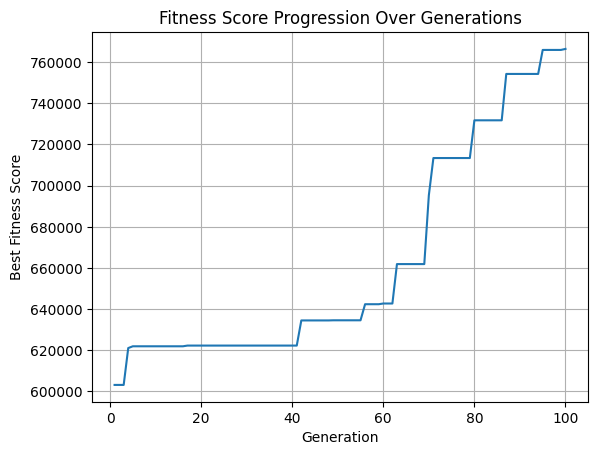

In [33]:
import matplotlib.pyplot as plt

generations = range(1, num_generations + 1)  # Ensure the number of generations matches the fitness_progress length

plt.plot(generations, fitness_progress)
plt.xlabel('Generation')
plt.ylabel('Best Fitness Score')
plt.title('Fitness Score Progression Over Generations')
plt.grid(True)
plt.show()

The best individual after 100 generations represents a solution in the search space that maximizes the **Human Development Index (HDI)** while minimizing **Carbon Dioxide (CO2) emissions per capita** and **Material Footprint per capita**. Here’s a breakdown of how this solution makes sense with respect to your objectives:

### 1. **Maximizing HDI**
   - **HDI** is an indicator of human development, combining life expectancy, education, and income metrics. 
   - The first value in the best individual `[ 95.46897977]` represents a large positive weight, indicating a strong influence on maximizing HDI. This means the genetic algorithm has found that increasing HDI leads to better fitness scores (which makes sense since we want to maximize HDI as one of the key objectives).

### 2. **Minimizing CO2 Emissions per Capita**
   - **CO2 emissions per capita** measure the environmental sustainability aspect, and we aim to minimize it.
   - The second value in the best individual `[-135.02311222]` is negative, indicating a penalty. This shows that the algorithm assigns a negative weight to CO2 emissions, correctly penalizing higher values of CO2 emissions, which aligns with your goal of minimizing environmental impact.

### 3. **Minimizing Material Footprint per Capita**
   - **Material Footprint per capita** reflects resource use and environmental sustainability, and similar to CO2 emissions, we want to minimize it.
   - The third value in the best individual `[-137.37841509]` is also negative, indicating that the algorithm penalizes a high material footprint per capita. The larger the negative number, the more the algorithm is pushing the solution to reduce material footprint.

### **Why Does It Make Sense?**

The best individual `[  95.46897977 -135.02311222 -137.37841509]` is a vector of weights that balances the three objectives of the optimization problem:
   - A positive weight for HDI indicates a push to maximize human development outcomes.
   - Negative weights for CO2 emissions and material footprint indicate penalties applied to unsustainable environmental practices. The more negative these values, the more importance the algorithm places on minimizing these environmental factors.
   
   The genetic algorithm is finding a trade-off solution—balancing between improving human development (HDI) while controlling or minimizing environmental impacts (CO2 and material footprint). The fact that the fitness score keeps improving across generations suggests that the algorithm is progressively finding solutions that better balance these objectives.

### **Fitness Score: 766,428**
The **fitness score** represents the objective function’s value, combining the effects of maximizing HDI and minimizing CO2 and material footprints. A high fitness score means that the solution effectively achieves both human development and sustainability objectives.

### **How This Solution Could Be Used**
   - **Policy Implications**: This optimization result could guide decision-makers towards strategies that significantly boost human development while keeping environmental degradation under control.
   - **Sustainability Goals**: The solution offers a balance between human well-being and environmental sustainability, which is crucial for addressing global challenges like climate change and resource depletion.

If we want to further understand the values of the best individual in terms of practical recommendations, we can investigate the specific countries or scenarios that these values might apply to in your dataset. Would you like to do that, or is there another step you’d like to focus on?

### Analyze the Best Individual(s)

In [39]:
# Apply best individual weights to the dataset
best_individual = np.array([95.46897977, -135.02311222, -137.37841509])

# Assume hdi, co2, and material footprint values are in your dataset
hdi_values = df['Human Development Index (2021)']
co2_values = df['Carbon dioxide emissions per capita (production) (tonnes) (2021)']
material_values = df['Material footprint per capita (tonnes) (2021)']

# Calculate the fitness score for each country or region
fitness_values = (
    best_individual[0] * hdi_values  # Maximizing HDI
    + best_individual[1] * co2_values  # Penalizing CO2 emissions
    + best_individual[2] * material_values  # Penalizing material footprint
)

# Display the fitness values for analysis
df['Fitness_Score_Best_Individual'] = fitness_values
df[['Country', 'Fitness_Score_Best_Individual']].sort_values(by='Fitness_Score_Best_Individual', ascending=False).head(10)

,Country,Fitness_Score_Best_Individual
142,North Korea,75.084475
157,San Marino,72.522051
101,Liechtenstein,71.333254
72,Hong Kong,69.695746
158,Somalia,64.083718
102,Sri Lanka,55.919714
122,Mauritius,55.676822
108,Monaco,53.909764
109,Moldova,53.909764
53,Spain,48.858914


In [40]:
# Create a baseline fitness function without heavy penalties
baseline_fitness = (
    hdi_values  # Only prioritize HDI, ignore environmental penalties
)

# Compare baseline vs optimized
df['Baseline_Fitness'] = baseline_fitness
df['Improvement'] = df['Fitness_Score_Best_Individual'] - df['Baseline_Fitness']

# Sort and analyze the top improvements
df[['Country', 'Improvement']].sort_values(by='Improvement', ascending=False).head(10)

,Country,Improvement
142,North Korea,74.250853
157,San Marino,71.710959
101,Liechtenstein,70.380048
72,Hong Kong,68.713077
158,Somalia,63.361014
102,Sri Lanka,55.231673
122,Mauritius,54.954119
108,Monaco,53.247719
109,Moldova,53.247719
53,Spain,47.957700


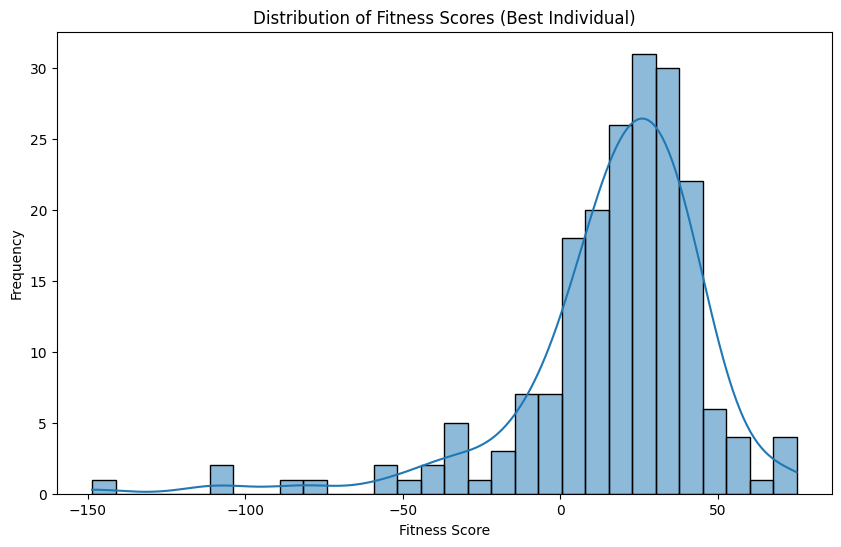

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of fitness scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Fitness_Score_Best_Individual'], kde=True, bins=30)
plt.title('Distribution of Fitness Scores (Best Individual)')
plt.xlabel('Fitness Score')
plt.ylabel('Frequency')
plt.show()

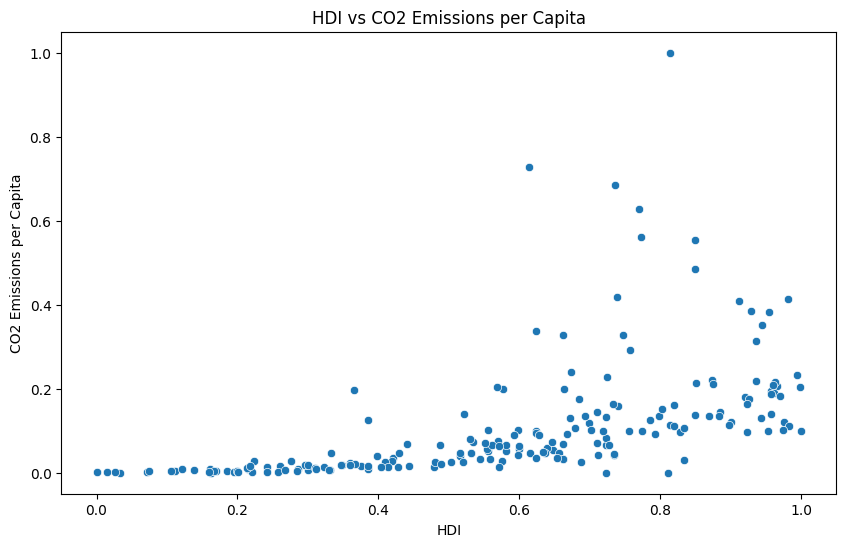

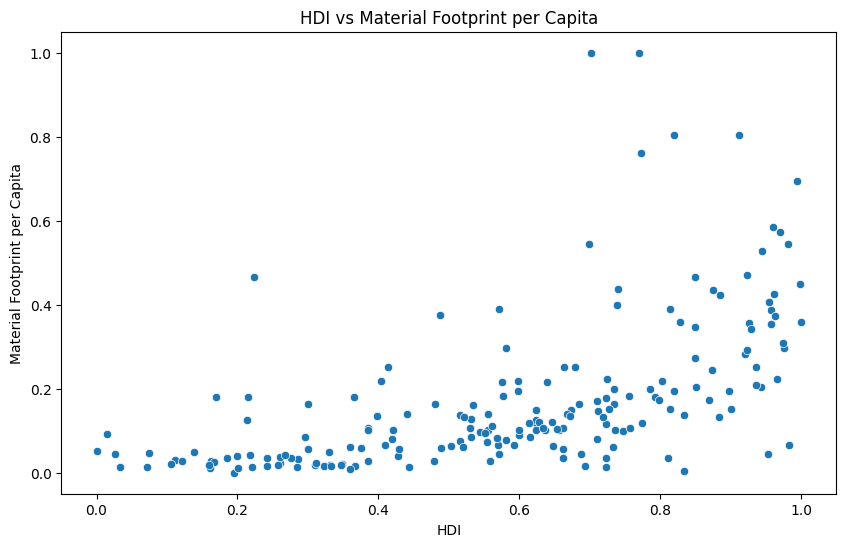

In [42]:
# HDI vs CO2 Emissions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=hdi_values, y=co2_values)
plt.title('HDI vs CO2 Emissions per Capita')
plt.xlabel('HDI')
plt.ylabel('CO2 Emissions per Capita')
plt.show()

# HDI vs Material Footprint
plt.figure(figsize=(10, 6))
sns.scatterplot(x=hdi_values, y=material_values)
plt.title('HDI vs Material Footprint per Capita')
plt.xlabel('HDI')
plt.ylabel('Material Footprint per Capita')
plt.show()

In [43]:
# Slightly modify the best individual weights and re-calculate fitness
modified_individual = best_individual + np.random.normal(0, 0.1, size=best_individual.shape)

# Recalculate fitness scores with the modified weights
modified_fitness_values = (
    modified_individual[0] * hdi_values
    + modified_individual[1] * co2_values
    + modified_individual[2] * material_values
)

# Compare the modified fitness with the original
df['Modified_Fitness_Score'] = modified_fitness_values
df[['Country', 'Fitness_Score_Best_Individual', 'Modified_Fitness_Score']].head(10)

,Country,Fitness_Score_Best_Individual,Modified_Fitness_Score
0,Afghanistan,12.881522,12.876136
1,Angola,28.136347,28.124173
2,Albania,42.220293,42.212272
3,Andorra,-54.045529,-53.957008
4,United Arab Emirates,-78.705171,-78.632426
5,Argentina,38.311381,38.302988
6,Armenia,45.893510,45.874261
7,Antigua and Barbuda,-23.971714,-23.918208
8,Australia,-37.055441,-37.028060
9,Austria,24.458684,24.457487
